In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("bike.csv")
df.head(1)

In [5]:
df_sub = df.loc[df["season"].isin([1, 3]), ] # %in%
df_sub["season"].unique()

array([1, 3], dtype=int64)

In [ ]:
sur = pd.read_excel("NDS_입문_사전설문결과표(NDS).xlsx", skiprows=3)
sur.tail(2)

In [17]:
sur_sub = sur.iloc[:10, :25]
sur_sub.tail(2)

No.    1    2    3    4    5    6  \
8   9. 제시된 용어 중 대략적으로 설명할 수 있는 용어의 개수는 몇 개 인가?  1.0  1.0  4.0  1.0  2.0  3.0   
9  10. 제시된 용어 중 대략적으로 설명할 수 있는 용어의 개수는 몇 개 인가?  1.0  1.0  4.0  2.0  2.0  4.0   

     7    8    9  ...   15   16   17   18   20   21   22   23   24   25  
8  2.0  1.0  2.0  ...  3.0  3.0  2.0  4.0  2.0  1.0  2.0  1.0  1.0  1.0  
9  2.0  1.0  2.0  ...  3.0  3.0  1.0  3.0  2.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 25 columns]

In [21]:
df_sur = pd.DataFrame({"question": sur["No."][:10],
                       "mean": sur_sub.iloc[:, 1:].mean(axis = 1)})
df_sur

question      mean
0               1. 최근 2년 내에 식스시그마 또는 통계교육을 받은 적이 있다.  3.750000
1  2. 기존에 C, JAVA 등 프로그래밍 교육을 받은 적이 있다. (R, Pytho...  3.958333
2                         3. 평소 업무 중 엑셀 사용 빈도는 어떠한가?  4.208333
3                   4. 본인의 VBA 또는 엑셀 메크로 운용능력은 어떠한가?  2.125000
4                       5. R 또는 Python을 사용해본 경험이 있다.  3.250000
5                   6. 본인의 업무에 데이터 분석을 활용할 계획이 있습니까?  3.458333
6                            7. 지루하고 반복적인 업무가 많은편이다.  2.708333
7              8. 본인의 업무 중 반복적인 업무의 자동화가 필요하다고 생각한다.  3.208333
8         9. 제시된 용어 중 대략적으로 설명할 수 있는 용어의 개수는 몇 개 인가?  1.958333
9        10. 제시된 용어 중 대략적으로 설명할 수 있는 용어의 개수는 몇 개 인가?  2.041667

In [ ]:
df = pd.read_csv("corr_national_indices.csv")
print(len(df))
df.head()

In [26]:
df_notna = df.dropna(how = "any")
print(len(df_notna))
df_notna.head()

2668


DATE   S&P500    JPX400     SSEC    KOSPI
3   2007-01-04  1418.34  14545.50  2715.72  1397.29
4   2007-01-05  1409.71  14326.44  2641.33  1385.76
8   2007-01-09  1412.11  14474.26  2807.80  1374.34
9   2007-01-10  1414.85  14213.79  2825.58  1355.79
10  2007-01-11  1423.82  14158.18  2770.11  1365.31

In [31]:
bike = pd.read_csv("bike.csv")

In [34]:
bike.groupby(["season", "holiday"])["casual"].mean().reset_index()

season  holiday     casual
0       1        0  15.689101
1       1        1   8.140845
2       2        0  47.609683
3       2        1  38.333333
4       3        0  50.773606
5       3        1  91.958333
6       4        0  28.133055
7       4        1  40.885417

In [ ]:
elec = pd.read_csv("elec_load.csv")
elec.head(2)

In [39]:
elec_melt = pd.melt(elec, id_vars=["YEAR", "MONTH", "DAY"])
elec_melt.head(1)

YEAR  MONTH  DAY variable  value
0  2008      1    1     X1HR  39638

## 연도별, 월별 평균 전력부하량을 계산하시오.

In [38]:
elec_melt.groupby(["YEAR", "MONTH"])["value"].mean().reset_index()

YEAR  MONTH         value
0    2008      1  38966.313172
1    2008      2  40074.241379
2    2008      3  38886.404570
3    2008      4  36740.554167
4    2008      5  35982.076613
..    ...    ...           ...
112  2017      5  53459.556452
113  2017      6  55747.798611
114  2017      7  59153.107527
115  2017      8  60130.142473
116  2017      9  55599.608333

[117 rows x 3 columns]

In [42]:
elec_melt.loc[:, "variable"] = elec_melt["variable"].str.replace(pat="[^0-9]",
                                                                 repl="")

### 1,213,324원

In [43]:
elec_melt.head(2)

YEAR  MONTH  DAY variable  value
0  2008      1    1        1  39638
1  2008      1    2        1  37425

In [45]:
elec_melt.loc[:, "variable"] = elec_melt["variable"].astype("int")
elec_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 5 columns):
YEAR        85104 non-null int64
MONTH       85104 non-null int64
DAY         85104 non-null int64
variable    85104 non-null int32
value       85104 non-null int64
dtypes: int32(1), int64(4)
memory usage: 2.9 MB


In [46]:
pd.crosstab()


    One-dimensional ndarray with axis labels (including time series).

    Labels need not be unique but must be a hashable type. The object
    supports both integer- and label-based indexing and provides a host of
    methods for performing operations involving the index. Statistical
    methods from ndarray have been overridden to automatically exclude
    missing data (currently represented as NaN).

    Operations between Series (+, -, /, *, **) align values based on their
    associated index values-- they need not be the same length. The result
    index will be the sorted union of the two indexes.

    Parameters
    ----------
    data : array-like, Iterable, dict, or scalar value
        Contains data stored in Series.

        .. versionchanged :: 0.23.0
           If data is a dict, argument order is maintained for Python 3.6
           and later.

    index : array-like or Index (1d)
        Values must be hashable and have the same length as `data`.
        Non-unique in

In [47]:
df.head(2)

DATE  S&P500  JPX400  SSEC    KOSPI
0  2007-01-01     NaN     NaN   NaN  1434.46
1  2007-01-02     NaN     NaN   NaN  1435.26

In [50]:
df = pd.read_csv("corr_national_indices.csv")

In [51]:
df = df.dropna(how = "any")
df.head(2)

DATE   S&P500    JPX400     SSEC    KOSPI
3  2007-01-04  1418.34  14545.50  2715.72  1397.29
4  2007-01-05  1409.71  14326.44  2641.33  1385.76

In [53]:
df.iloc[:, 1:].corr()

S&P500    JPX400      SSEC     KOSPI
S&P500  1.000000  0.808912  0.180266  0.809720
JPX400  0.808912  1.000000  0.534587  0.526461
SSEC    0.180266  0.534587  1.000000  0.182855
KOSPI   0.809720  0.526461  0.182855  1.000000

In [54]:
import seaborn as sns

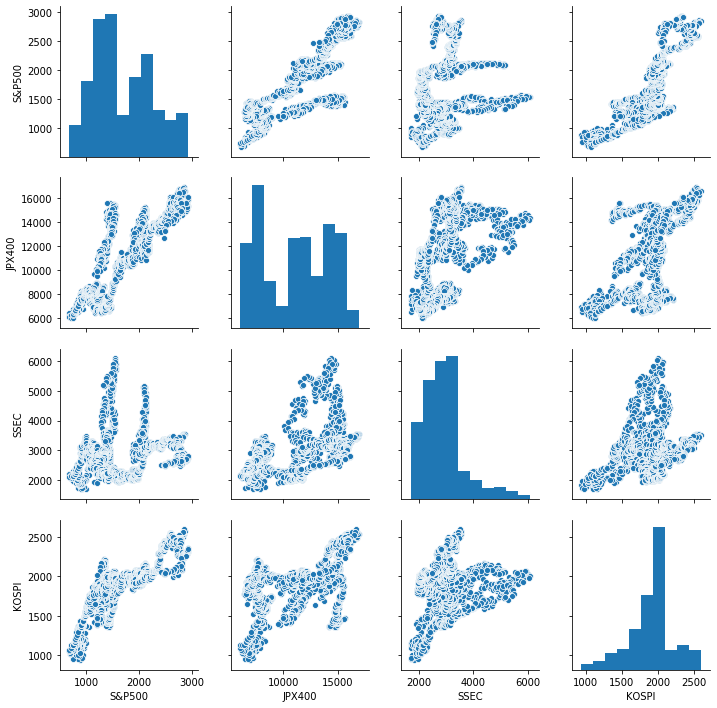

In [56]:
sns.pairplot(df.iloc[:, 1:])

In [57]:
df = pd.read_csv("bike.csv")
df.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [ ]:
df.loc[:, "datetime"] = pd.to_datetime(df["datetime"])
df.loc[:, "wday"] = df["datetime"].dt.weekday
df.loc[:, "wend"] = (df["wday"] >= 5) + 0
df.head()

In [59]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(df.loc[df["wend"] == 1, "casual"],
                    df.loc[df["wend"] == 0, "casual"],
                    equal_var = True) 
print(stat)
print(p) # 0.05 보다 작으면 귀무가설 기각

34.20622323223231
1.1588324471094126e-243


In [ ]:
import statsmodels.formula.api as smf
dia = pd.read_csv("diamonds.csv")
dia.head(1)

In [65]:
df_model = dia.loc[:, ["price", "carat", "depth"]]
model = smf.ols("price ~ carat + depth", data = df_model)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:43:32   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4045.3332    286.205     14.134      0.000    3484.368    4606.298
carat       7765.1407     14.009    554.282      0.000    7737.682    7792.599
depth       -102.1653      4.635    -22.041      0.000    -111.251     -93.080
==============================================================================
Omnibus:                    14148.858   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148236.675
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      10.890   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""